<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/%5Bpractice%5D_Ensemble_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ensemble 모델

## [P.1] Bagging 모델

먼저, 결정 트리 기반의 bagging 알고리즘을 구현할 것임

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/machine_learning/ensemble

/content/drive/MyDrive/machine_learning/ensemble


In [21]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [22]:
X, y = make_moons(n_samples=1000, noise=0.50)
# get train, test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

결정 트리를 기반으로 하기 때문에 이전의 `DecisionTreeClassifier` 클래스를 [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)로 감싸서 모델을 구현함

In [6]:
from sklearn.tree import DecisionTreeClassifier  # 결정 트리 분류 모델
from sklearn.ensemble import BaggingClassifier

In [7]:
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=0.5, bootstrap=True)
# n_estimators : 학습할 트리 모델의 수 / max_samples : 전체 데이터 수 중 추출할 데이터의 수(정수 : 추출할 데이터 수, 실수 : 전체 데이터 수 중 추출할 데이터의 비율)

# Train 데이터 학습
bag_clf.fit(X_train, y_train)
# Test 데이터 학습
y_pred = bag_clf.predict(X_test)

In [8]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.796

위의 성능을 단순한 결정 트리 모델 성능과 비교해보기

In [9]:
# 결정 트리 모델로만 성능을 얻어보기!
########################
tree_clf = DecisionTreeClassifier()

# Train 데이터 학습
tree_clf.fit(X_train, y_train)
# Test 데이터 학습
y_pred = tree_clf.predict(X_test)

accuracy_score(y_pred, y_test)
########################

0.784

단순 결정 트리 모델보다는 앙상블 학습이 더 성능이 좋은 것을 알 수 있다.

학습된 두 모델의 시각화를 해보면 다음과 같음


In [10]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    # plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o") # make_moons는 class 2개니까 하나 주석처리

    if show:
        plt.show()

In [11]:
def plot_decision_boundary(clf, axes=None):
    if axes is None:
        x0 = np.linspace(-3, 4, 100)
        x1 = np.linspace(-3, 4, 100)
    else:
        x0 = np.linspace(axes[0][0], axes[0][1], 100)
        x1 = np.linspace(axes[1][0], axes[1][1], 100)


    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_pred = clf.predict(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, alpha=0.25)
    plt.show()

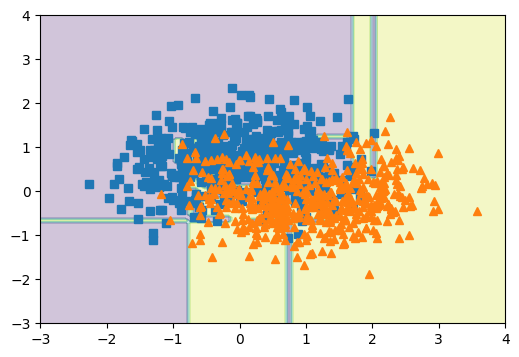

In [12]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(tree_clf)

plt.show()

over_fitting된 경향이 보인다. (결정 경계 복잡)

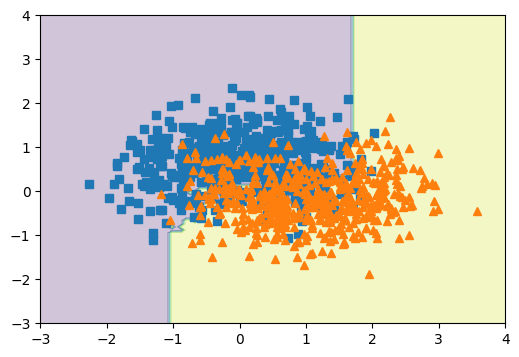

In [13]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(bag_clf)

plt.show()

확실히 결정 경계가 더 단순해진 것을 통해, 여러 트리의 앙상블로 분산 오류가 줄어든 것을 볼 수 있음

## [P.2] Random Forest 모델

트리 모델 간의 상관 관계를 줄여 앙상블 효과를 극대화하는 Random Forest 모델을 구현하고 성능을 평가해볼 것임     
사이킷런에서 제공하는 [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 클래스를 사용하면 됨

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델을 정의하고 모델을 학습시켜보기
#####################
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

accuracy_score(y_pred, y_test)
#####################

0.816

Bagging보다 성능이 더 좋아진 것을 볼 수 있다.(분산 오류 감소)

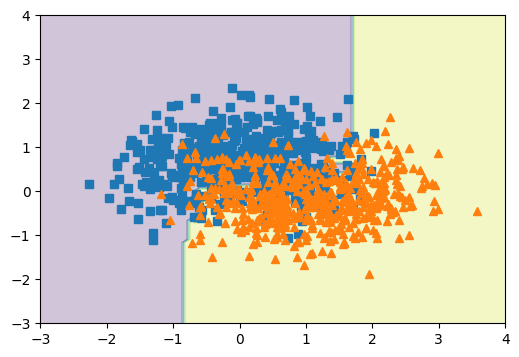

In [15]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(rnd_clf)

plt.show()

Bagging tree의 장점은 각 피처들의 중요도를 계산해, 모델에 대한 설명가능성을 키워줄 수 있음    

In [16]:
# 피처의 중요도 출력
rnd_clf.feature_importances_

array([0.45628473, 0.54371527])

In [18]:
# 피처 중요도 출력 예제
from sklearn.datasets import load_iris

# iris 데이터셋 전체를 학습한 이후에, 각 피처에 대한 중요도를 뽑아주세요.
# load_iris()['feature_names'] 활용
####################
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

print(accuracy_score(y_pred, y_test))

for feat, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(f"{feat}'s importance : {score}")
####################

0.9210526315789473
sepal length (cm)'s importance : 0.0781737552931448
sepal width (cm)'s importance : 0.02667320065448978
petal length (cm)'s importance : 0.4410340172878472
petal width (cm)'s importance : 0.45411902676451826


## [P.3] AdaBoost 모델

이번에는 Boosting 알고리즘인 `AdaBoost`를 활용해 모델을 구현해볼 것임     
사이킷런에서 제공하는 [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) 클래스를 사용하면 쉽게 구현 가능함     

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost는 stump 구조(split 1번 = 2 terminal node) -> max_depth가 1인 이유
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.5)

# 이전과 똑같이 학습 및 평가해주세요.
####################
ada_clf.fit(X_train, y_train) # iris 데이터 말고 make_moon 데이터 사용
y_pred = ada_clf.predict(X_test)
accuracy_score(y_pred, y_test)
####################

0.82

=> 랜덤 포레스트와 비슷한 성능

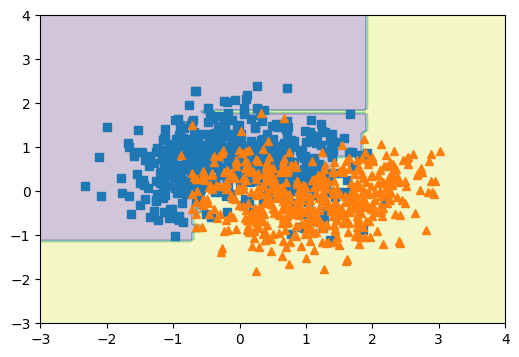

In [24]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(ada_clf)

plt.show()

### Q1. Bagging과 Boosting의 차이가 무엇일까요?<br>

Bagging
- Bootstrap AGGregatING -> 부트스트랩을 집계한다.
- Bootstrap : 임의의 개수의 데이터들을 복원추출하는 것
- 모집단의 분포를 알고 싶을 때 표본집단의 분포를 통해 모집단의 분포를 짐작할 수 있는데, 표본집단이 많지 않으니까 하나의 표본집단으로부터 <b>bootstrap</b>을 통해 여러 포본집단을 만들고 그 표본집단들을 <b>병렬</b>로 각각 학습한 후, 집계(ex. 평균)하는 방법
- 장점 : 데이터가 충분하지 않더라도 충분한 학습효과를 주어 과적합 방지
- 대표적인 bagging 알고리즘 : Random Forest

Boosting
- bagging과 달리 순차적으로 학습
- 이전 모델의 학습 결과를 바탕으로 학습 데이터 샘플의 가중치를 조정해 다음 모델에 반영하여 학습하는 것
- 즉 이전 스텝에서 생성된 모델을 꾸준히 개선해 나가는 식으로 학습이 진행
- 장점 : 오답에 대해 높은 가중치를 부여하므로, 즉 오차(residual)를 꾸준히 줄여나가므로 정확도가 높다.
- 단점 : outlier에 취약
- 대표적인 boosting 알고리즘 : AdaBoost, Gradient Boost(GBM), XGBoost


### Q2. AdaBoost에서 `DecisionTreeClassifier`의 `max_depth` argument를 1로 설정해준 이유는?<br>

AdaBoost는 stump 구조를 사용하기 때문

### Q3. AdaBoost 모델이 만약 학습 데이터셋에 underfit된 상황이라면, 어떤 하이퍼파라미터를 사용할 수 있을까요?